The two models that I have chosen for this projects are :
    1) Linear Regression 
    2) Knn Neighbor Classifier 
The dataset I used is a dataset on public schools in the US. It contains Average SAT math score, % Economically Disadvantaged Students, Class Size, etc for its columns. 


I use the linear regression model to predict the Average SAT math score from the % Economically Disadvantaged students in the school. 
I found that schools which have 10% more of economically disadvantaged students, will on average have a 27.8 lower average SAT math score compared to other schools 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression 



In [3]:
data = pd.read_csv("MA_Public_Schools_2017.csv")
data1 = pd.read_csv("MA_Public_Schools_datadict.csv")
data.describe(include='all')
list(data)

['School Code',
 'School Name',
 'School Type',
 'Function',
 'Contact Name',
 'Address 1',
 'Address 2',
 'Town',
 'State',
 'Zip',
 'Phone',
 'Fax',
 'Grade',
 'District Name',
 'District Code',
 'PK_Enrollment',
 'K_Enrollment',
 '1_Enrollment',
 '2_Enrollment',
 '3_Enrollment',
 '4_Enrollment',
 '5_Enrollment',
 '6_Enrollment',
 '7_Enrollment',
 '8_Enrollment',
 '9_Enrollment',
 '10_Enrollment',
 '11_Enrollment',
 '12_Enrollment',
 'SP_Enrollment',
 'TOTAL_Enrollment',
 'First Language Not English',
 '% First Language Not English',
 'English Language Learner',
 '% English Language Learner',
 'Students With Disabilities',
 '% Students With Disabilities',
 'High Needs',
 '% High Needs',
 'Economically Disadvantaged',
 '% Economically Disadvantaged',
 '% African American',
 '% Asian',
 '% Hispanic',
 '% White',
 '% Native American',
 '% Native Hawaiian, Pacific Islander',
 '% Multi-Race, Non-Hispanic',
 '% Males',
 '% Females',
 'Total # of Classes',
 'Average Class Size',
 'Number of

In [4]:
table = data.loc[:, ["12_Enrollment","Average Class Size", "% Attending College", '% First Language Not English', "% Students With Disabilities", "High Needs", "% Economically Disadvantaged", "% Asian", "% Hispanic", "% White", "% Native American", "% Native Hawaiian, Pacific Islander", "% Multi-Race, Non-Hispanic", "% Males", "% Females", "Number of Students", "Average In-District Expenditures per Pupil","Average Expenditures per Pupil",'Average SAT_Reading','Average SAT_Writing','Average SAT_Math']]

In [5]:
df_12enrollment = table["12_Enrollment"]>0
table2 = table[df_12enrollment]
students_enrolled_12grade = table2 
students_enrolled_12grade

,12_Enrollment,Average Class Size,% Attending College,% First Language Not English,% Students With Disabilities,High Needs,% Economically Disadvantaged,% Asian,% Hispanic,% White,...,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Number of Students,Average In-District Expenditures per Pupil,Average Expenditures per Pupil,Average SAT_Reading,Average SAT_Writing,Average SAT_Math
0,92,15.8,75.8,5.3,9.7,130.0,21.5,1.5,9.1,85.8,...,0.2,0.9,45.6,54.4,451.0,12050.39,13270.84,520.0,498.0,516.0
8,315,16.8,81.6,4.6,14.1,391.0,22.7,2.2,5.8,88.8,...,0.1,1.9,52.0,48.0,1242.0,13546.48,14363.21,496.0,475.0,514.0
16,163,16.7,72.6,2.9,17.0,154.0,14.6,1.2,4.2,90.7,...,0.0,2.5,53.5,46.5,621.0,13001.25,13771.87,531.0,518.0,534.0
17,11,7.6,NaN,0.0,51.6,26.0,74.2,0.0,6.5,87.1,...,0.0,6.5,64.5,35.5,33.0,13001.25,13771.87,NaN,NaN,NaN
23,462,14.7,89.3,9.5,16.1,377.0,6.3,14.5,5.0,76.3,...,0.0,2.2,48.9,51.1,1799.0,14703.35,15601.70,566.0,562.0,581.0
33,295,14.3,85.0,12.4,11.1,267.0,10.3,10.7,5.7,75.6,...,0.2,3.7,49.1,50.9,1255.0,12316.61,13382.77,581.0,576.0,592.0
43,187,14.6,87.7,11.3,13.2,170.0,10.3,9.0,9.4,77.2,...,0.0,2.2,48.8,51.2,746.0,12867.66,13607.92,549.0,530.0,576.0
49,14,7.6,21.9,12.7,9.5,34.0,46.0,1.6,11.1,76.2,...,0.0,7.9,54.0,46.0,72.0,12517.75,12980.40,NaN,NaN,NaN
50,392,18.1,74.3,10.2,14.2,593.0,25.6,4.1,12.5,73.6,...,0.2,3.8,54.2,45.8,1724.0,12517.75,12980.40,494.0,490.0,504.0
60,157,17.3,79.1,5.7,9.6,189.0,15.2,4.3,6.4,84.0,...,0.0,2.8,48.1,51.9,776.0,13185.35,13580.88,488.0,477.0,505.0


In [21]:
poor = data.loc[:, ["12_Enrollment","% Economically Disadvantaged",'Average SAT_Math','Average Class Size']]
newpoor = poor["12_Enrollment"]>0
newpoor1 = poor[newpoor]
newpoor1.replace(to_replace = [np.inf, -np.inf], value = np.nan)
newpoor1 = newpoor1.dropna(axis = 0, how ='any')
newpoor1
#np.all(np.isfinite(newpoor1))
#np.any(np.isnan(newpoor1))


,12_Enrollment,% Economically Disadvantaged,Average SAT_Math,Average Class Size
0,92,21.5,516.0,15.8
8,315,22.7,514.0,16.8
16,163,14.6,534.0,16.7
23,462,6.3,581.0,14.7
33,295,10.3,592.0,14.3
43,187,10.3,576.0,14.6
50,392,25.6,504.0,18.1
60,157,15.2,505.0,17.3
64,45,23.8,481.0,13.3
66,334,25.5,513.0,15.3


df_12enrollment.describe()

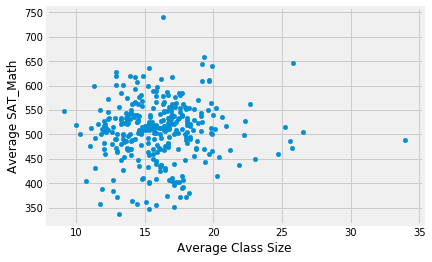

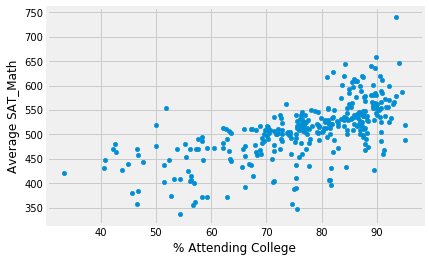

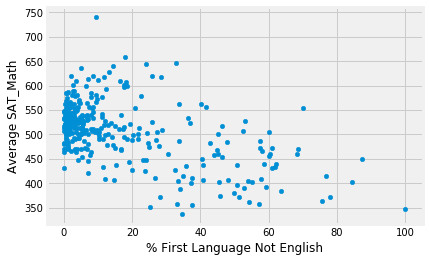

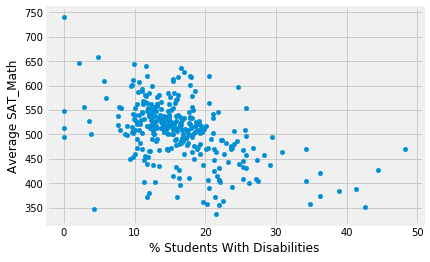

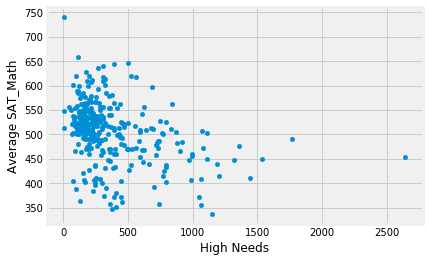

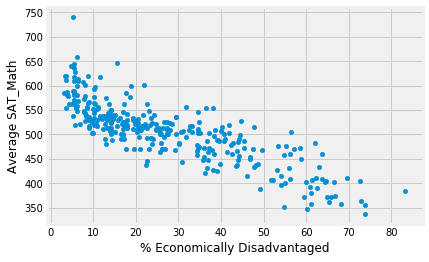

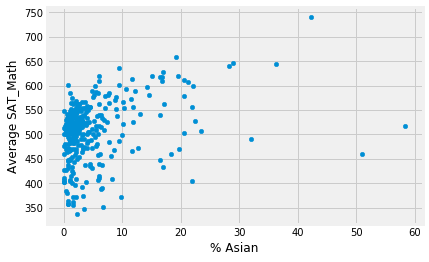

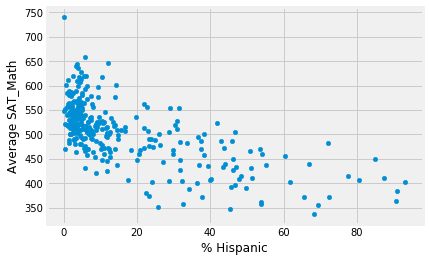

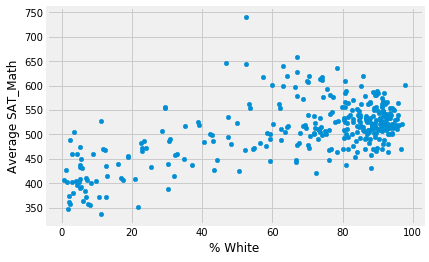

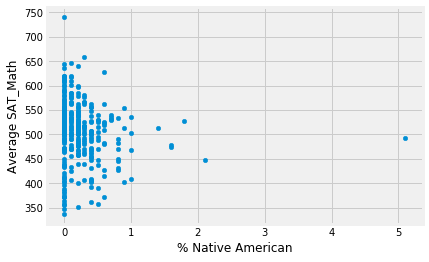

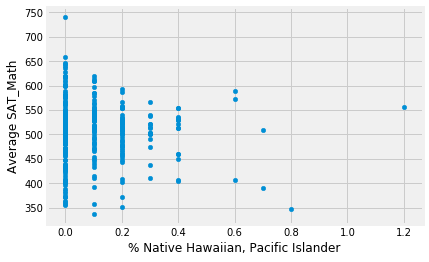

In [7]:
table2.plot.scatter("Average Class Size", 'Average SAT_Math', s=None, c=None)
table2.plot.scatter( "% Attending College",'Average SAT_Math', s=None, c=None)
table2.plot.scatter( '% First Language Not English','Average SAT_Math', s=None, c=None)
table2.plot.scatter( '% Students With Disabilities','Average SAT_Math', s=None, c=None)
table2.plot.scatter( "High Needs",'Average SAT_Math', s=None, c=None)
table2.plot.scatter("% Economically Disadvantaged",'Average SAT_Math', s=None, c=None)
table2.plot.scatter("% Asian" ,'Average SAT_Math', s=None, c=None)
table2.plot.scatter("% Hispanic" ,'Average SAT_Math', s=None, c=None)
table2.plot.scatter("% White",'Average SAT_Math',  s=None, c=None)
table2.plot.scatter("% Native American" ,'Average SAT_Math', s=None, c=None)
table2.plot.scatter("% Native Hawaiian, Pacific Islander" ,'Average SAT_Math', s=None, c=None)

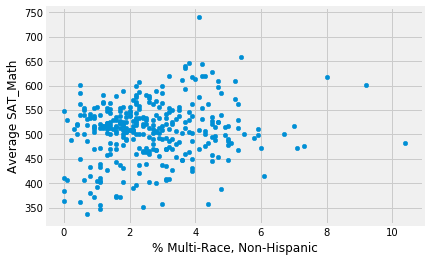

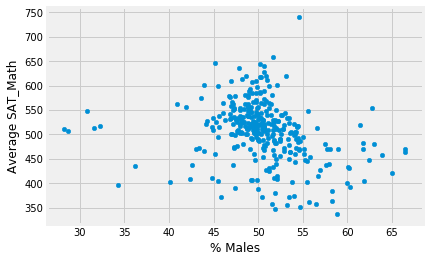

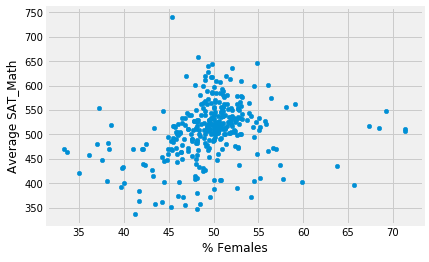

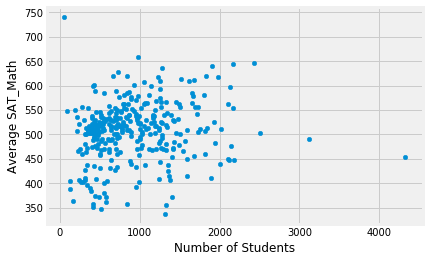

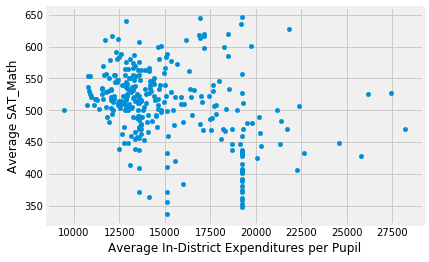

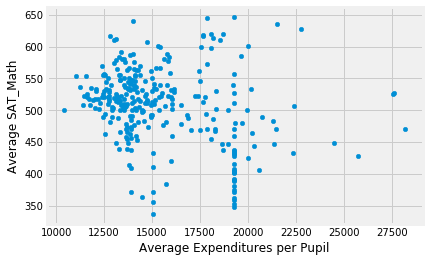

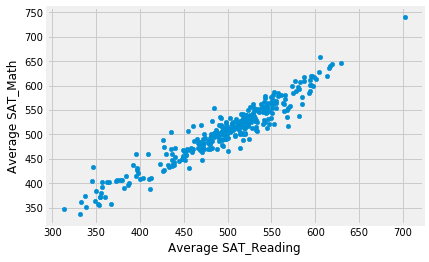

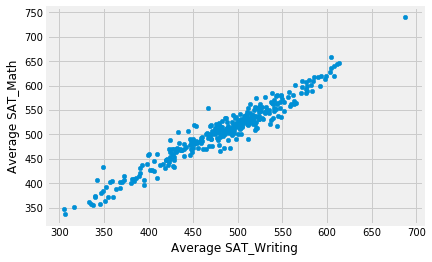

In [8]:
table2.plot.scatter("% Multi-Race, Non-Hispanic",'Average SAT_Math', s=None, c=None)
table2.plot.scatter("% Males" ,'Average SAT_Math', s=None, c=None)
table2.plot.scatter("% Females" ,'Average SAT_Math', s=None, c=None)
table2.plot.scatter("Number of Students" ,'Average SAT_Math', s=None, c=None)
table2.plot.scatter("Average In-District Expenditures per Pupil", 'Average SAT_Math', s=None, c=None)
table2.plot.scatter("Average Expenditures per Pupil" ,'Average SAT_Math', s=None, c=None)
table2.plot.scatter('Average SAT_Reading', 'Average SAT_Math', s=None, c=None)
table2.plot.scatter('Average SAT_Writing' ,'Average SAT_Math', s=None, c=None)

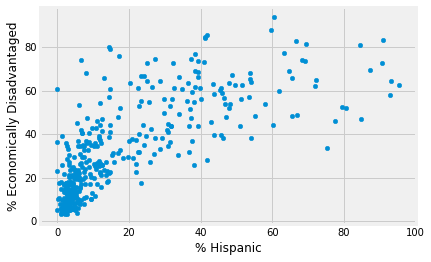

In [9]:
table2.plot.scatter("% Hispanic", "% Economically Disadvantaged")

In [10]:
table2.replace(to_replace = [np.inf, -np.inf], value = np.nan)

table2 = table2.dropna(axis = 0, how ='any')
table2
np.all(np.isfinite(newpoor1))
np.any(np.isnan(newpoor1))

False

In [15]:
x = newpoor1['% Economically Disadvantaged'].values[:np.newaxis]
y = newpoor1['Average SAT_Math']

# Reshaping
x, y = x.reshape(-1,1), y.reshape(-1, 1)

# Linear Regression Object 
lin_regression = LinearRegression()

# Fitting linear model to the data
lin_regression.fit(x,y)

# Get slope of fitted line
m = lin_regression.coef_

# Get y-Intercept of the Line
b = lin_regression.intercept_

# Get Predictions for original x values
# you can also get predictions for new data
predictions = lin_regression.predict(x)

print (b)
print (m)
 

[581.28105413]
[[-2.779787]]


After doing multiple scatterplots using dependent variable y as % economically disadvantaged and testing different x variables such as class size, % students who graduated from the high school who attend college, % First Language not English, High Needs, % Students who are Economically Disadvantaged, % students who are Asian, % students who are Hispanic, % students who are Native American, % Native Hawaian, Pacific Islander, % Multirace, Non Hispanic, % Males as well as other variables, I found that the variable which highly correlates with Average SAT math score is % of students who are economically disadvantaged in the school. Thus, I decided to run linear regression with average SAT Math score as my dependent variable and % economically disadvantaged as my x variable. 

After running linear regression, I found that the regression equation is  Average_SAT_math = -2.78*(% Economically Disadvantaged) + 581

So, for instance, if the percentage of students in a particular high school who is economically disadvantaged is 10%, then the average SAT math score for a student in that high school is 27.8 points lower than a student who did not study in the school. 

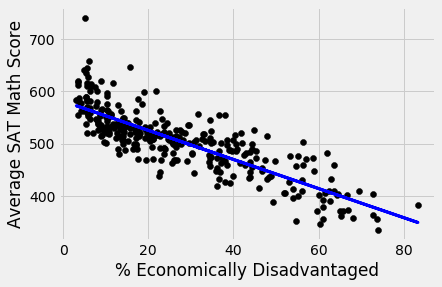

In [11]:
plt.scatter(x, y,  color='black')
a =plt.plot(x, predictions, color='blue',linewidth=3)
plt.xlabel('% Economically Disadvantaged')
plt.ylabel('Average SAT Math Score')
plt.show()


In [176]:
#draw a scatterplot
def scatter(table, xcol, ycol, marker_color='blue'):
    
    #Cleaning missing and invalid data in table
    table.replace(to_replace = [np.inf, -np.inf], value = np.nan)
    table = table.dropna(axis = 0, how ='any')
 
    #Assigning axes
    x = table[xcol].values[:np.newaxis]
    y = table[ycol] 

    # Reshaping
    x, y = x.reshape(-1,1), y.reshape(-1, 1)
    
    plt.scatter(x, y,  color = marker_color)


#Regress on a scatterplot with xcol and ycol (column names - str) from table
def scatter_and_regress(table, xcol, ycol, marker_color='blue'):
    
    #Cleaning missing and invalid data in table
    table.replace(to_replace = [np.inf, -np.inf], value = np.nan)
    table = table.dropna(axis = 0, how ='any')
 
    #Assigning axes
    x = table[xcol].values[:np.newaxis]
    y = table[ycol] 

    # Reshaping
    x, y = x.reshape(-1,1), y.reshape(-1, 1)

    # Linear Regression Object 
    lin_regression = LinearRegression()

    # Fitting linear model to the data
    lin_regression.fit(x,y)

    # Get slope of fitted line
    m = lin_regression.coef_

    # Get y-Intercept of the Line
    b = lin_regression.intercept_

    # Get Predictions for original x values
    predictions = lin_regression.predict(x)

    plt.scatter(x, y,  color = marker_color)
    plt.plot(x, predictions, color='black',linewidth=3)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.show()


In [181]:
KNN = students_enrolled_12grade.loc[:, ['% Economically Disadvantaged','% Students With Disabilities', 'High Needs', '% Attending College']]
KNN.head(3)

#reshuffle rows and divide into 2 sets - training and testing sets

,% Economically Disadvantaged,% Students With Disabilities,High Needs,% Attending College
0,21.5,9.7,130.0,75.8
8,22.7,14.1,391.0,81.6
16,14.6,17.0,154.0,72.6


In [195]:

def cutoff_and_above(df, column, cutoff_value):
    """For each row, return True if the value in the column is equal to and above the cutoff_value"""
    classified = (df[column]>=cutoff_value)
    
    #Showing number of True (equal and above) and False values
    print(classified.value_counts())
    return classified

    
def color_code(bool_array):
    """Return a color-coded array: 'Blue' for True values; 'Red' for False"""
    color = bool_array.apply(lambda row: 'Blue' if row else 'Red')
    return color


def scatter_and_colorcode(table, xcol, ycol, color_col):
    """Draw a scatterplot w.r.t. Color column in table"""
    color = table[color]
    scatter(table, xcol, ycol, color)

def distance_two_features(df, x_feature, y_feature):
    x1-x2 y1-y2
    """Compute the distance between x_feature and y_feature"""
    x = df[x_feature] 
    y = df[y_feature]
    return np.sqrt(- rotem(x_feature))**2 + (row0.item(y_feature)-row1.item(y_feature))**2)


In [207]:
#Divide schools into 2 classes using 70% Attending College as boundary
classified = cutoff_and_above(KNN, '% Attending College', 70)
KNN['Class'] = classified
KNN['Color'] = color_code(classified)
KNN.head(3)

True     248
False    146
Name: % Attending College, dtype: int64


,% Economically Disadvantaged,% Students With Disabilities,High Needs,% Attending College,Class,Color
0,21.5,9.7,130.0,75.8,True,Blue
8,22.7,14.1,391.0,81.6,True,Blue
16,14.6,17.0,154.0,72.6,True,Blue


(0, 50)

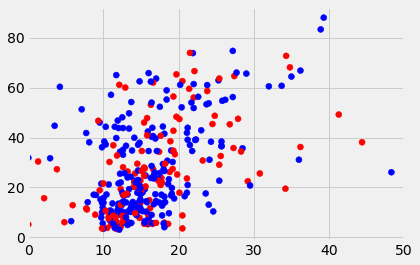

In [209]:
scatter_and_colorcode(KNN, '% Students With Disabilities','% Economically Disadvantaged', 'Color')
plt.xlim(0,50)

(0, 40)

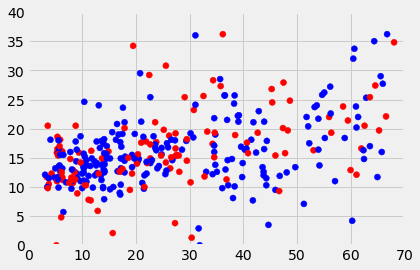

In [215]:
scatter_and_colorcode(KNN, '% Economically Disadvantaged','% Students With Disabilities', 'Color')
plt.xlim(0,70)
plt.ylim(0,40)

(0, 80)

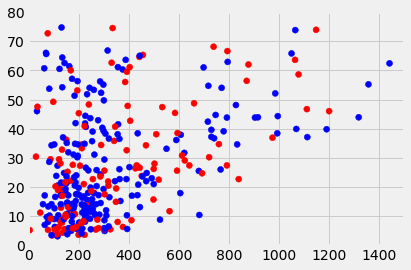

In [211]:
scatter_and_colorcode(KNN, 'High Needs','% Economically Disadvantaged', 'Color')
plt.xlim(0,1500)
plt.ylim(0,80)

(0, 1000)

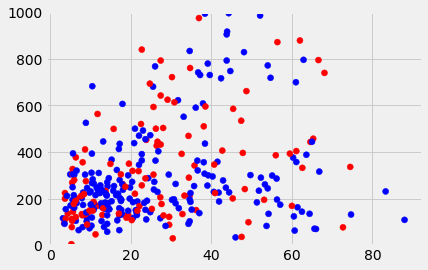

In [212]:
scatter_and_colorcode(KNN,'% Economically Disadvantaged', 'High Needs', 'Color')
plt.ylim(0,1000)

The second model that I use is K nearest neighbors. 
I wish to predict % of students attending college from a particular high school based on the the percentage of students who are economically disadvantaged and are disabled in a particular school. 
After building the model and running the code, I printed a list of my predictions. 
In the first row, the actual percentage of people attending college is 85.5% while the predicted percentage of people attending college is 81.44%

In [43]:
KNN = students_enrolled_12grade.loc[:, ['% Economically Disadvantaged','% Students With Disabilities', '% Attending College']]
#Cleaning missing and invalid data in table
KNN.replace(to_replace = [np.inf, -np.inf], value = np.nan)
KNN = table.dropna(axis = 0, how ='any')

#Sourcecode: https://www.dataquest.io/blog/k-nearest-neighbors-in-python/
import random
import math
from numpy.random import permutation

# Randomly shuffle the index of KNN.
random_indices = permutation(KNN.index)
# Divide the data into half for training and testing set
test_cutoff = math.floor(len(KNN)/2)
# Generate the test set by taking the first 1/2 of the randomly shuffled indices.
test = KNN.loc[random_indices[1:test_cutoff]]
# Generate the train set with the rest of the data.
train = KNN.loc[random_indices[test_cutoff:]]
# The columns that we will be making predictions with.
x_columns = ['% Economically Disadvantaged','% Students With Disabilities']
# The column that we want to predict.
y_column = ['% Attending College']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])
    
# Get the actual values for the test set.
actual = test[y_column]
Actual_vs_Predictions = {'Actual': actual, 'Predicted': predictions}
print(Actual_vs_Predictions)

# Compute the mean squared error of our predictions.
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
print(mse)

{'Actual':       % Attending College
687                  85.5
538                  72.2
1193                 80.4
1451                 71.9
758                  76.7
1554                 72.5
668                  89.7
1621                 87.5
957                  75.6
1353                 71.8
833                  84.2
1661                 70.3
516                  82.8
1654                 85.6
972                  94.5
1278                 62.8
1838                 67.2
819                  75.3
290                  85.8
380                  79.3
1644                 58.3
346                  77.2
1260                 70.1
148                  56.3
807                  81.2
866                  77.9
879                  80.0
131                  65.5
993                  84.5
406                  90.0
...                   ...
1458                 81.4
1185                 57.6
1031                 57.7
330                  71.0
1826                 60.6
499                  51.5
1